# Ford GoBike System Data

Each trip is anonymized and includes:

(Represented in chorological order of the table) <br>
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb 
import datetime

# from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
# import geopandas as gpd # To create GeodataFrame
# from geopandas import GeoDataFrame

## Gather Data

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

## Clean Data

In [9]:
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [11]:
#Extract day_name of the week from time
df["start_day_week"] = df["start_time"].dt.day_name()
df["end_day_week"] = df["end_time"].dt.day_name()

#Extract Month_name from the time
df["month"] = df["start_time"].dt.month_name()

In [12]:
#Extract the duration of the rent in hours
df["duration_minutes"] = df["duration_sec"]/60

#Extract the number of hours 
df["duration_hours"] = df["duration_minutes"]/60

In [14]:
#Check null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
start_day_week             0
end_day_week               0
month                      0
duration_minutes           0
duration_hours             0
dtype: int64

In [15]:
#Check duplicates 
df.duplicated().sum()

0

In [17]:
#Delete the series which are not required
df.drop(['duration_sec', 'start_time','end_time','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'] , axis=1, inplace= True)

In [18]:
#Change to categorical data types
df[['start_station_id','end_station_id','bike_id','user_type', 'start_day_week', 'end_day_week']].apply(lambda x: x.astype('category'))

,start_station_id,end_station_id,bike_id,user_type,start_day_week,end_day_week
0,74,43,96,Customer,Sunday,Monday
1,284,96,88,Customer,Sunday,Monday
2,245,245,1094,Customer,Sunday,Monday
3,60,5,2831,Customer,Sunday,Monday
4,239,247,3167,Subscriber,Sunday,Monday
...,...,...,...,...,...,...
519695,81,45,400,Subscriber,Wednesday,Wednesday
519696,66,321,316,Subscriber,Wednesday,Wednesday
519697,21,48,240,Subscriber,Wednesday,Wednesday
519698,58,59,669,Subscriber,Wednesday,Wednesday


In [20]:
df.drop_duplicates(inplace = True)

## Visualization

Exploration of each entity is important to understand the trend of the Ford Gobike Data. 

### Univariate Exploration of Data
**Question : What month is famous for most/least rentals throughout the year?**

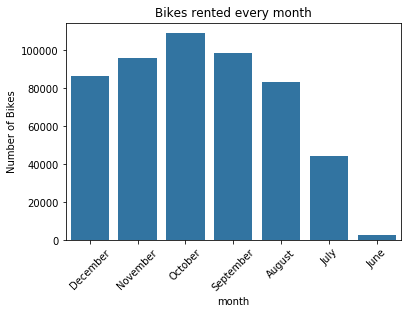

In [22]:
#create horizontal bar chart
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='month', color=base_color )
plt.xticks(rotation=45)
plt.ylabel('Number of Bikes')
plt.title('Bikes rented every month');

Throught the year:
People like to rent bikes during the month of **October** the most. Over 100000 bikes were rented during this month.
<br>Top 3 months of the year for rentals:
1. October 
2. September
3. November

Based on the given data - People hardly use bikes in June. 

**Question : Is weekend the most busy day for rentals?**

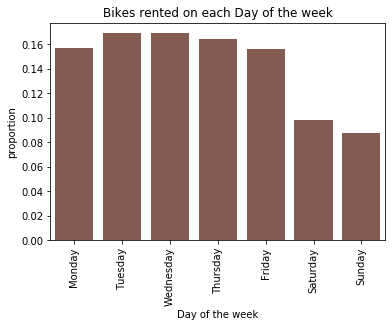

In [23]:
#generate proportion
n_points = df.shape[0]
max_count = df['start_day_week'].value_counts().max()
max_prop = max_count/n_points

#generate tick mark location and names 
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Order the weekdays 
level_order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['start_day_week'] = df['start_day_week'].astype(ordered_cat)

#create plot
base_color = sb.color_palette()[5]
sb.countplot(data=df, x ='start_day_week', color=base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('Day of the week')
plt.title('Bikes rented on each Day of the week')
plt.xticks(rotation = 90);


Looks like the bikes are rented during the weekdays, If I had to guess - bikes are used to commute to the work place. 

**Question : How long the bikes are rented?**

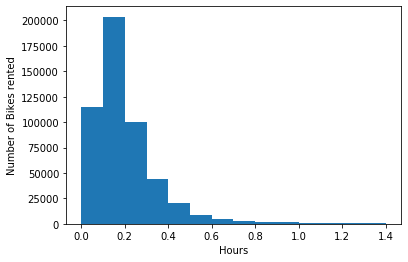

In [24]:
# w = 2
# bins_list = np.ceil((df.duration_hours.max() - df.duration_hours.min())/w)
bin_edge = np.arange(0, 1.5, 0.1)
plt.hist(data=df, x='duration_hours', bins=bin_edge)
plt.xlabel('Hours')
plt.ylabel('Number of Bikes rented');

Mostly, bikes are rented for around 12 mintues or 0.2 hour

**Question : Do the subscribers rent more than the non-subscribers?** 

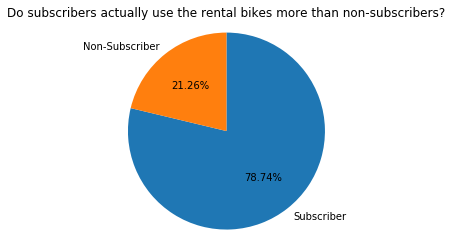

In [25]:
#Change the 'customer' to 'non-Subscriber' in the user_type series
df['user_type'].replace({'Customer' : 'Non-Subscriber'}, inplace = True)

#plot the pie chart
sorted_counts = df.user_type.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, autopct='%1.2f%%', counterclock = False)
plt.axis('square')
plt.title('Do subscribers actually use the rental bikes more than non-subscribers?');

The pie chart answers our question. **Subscribers** do use the rental bikes more than Non-Subscribers. Probably because of the discounts or lower rate of charges. 

**Question : What are the top 10 Busiest stations for Bike pickups and dropof?**

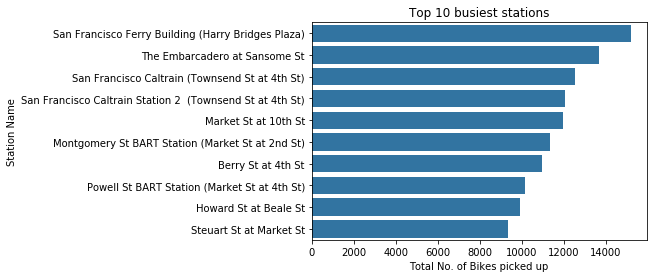

In [26]:
sb.barplot(x=df.start_station_name.value_counts()[:10].values, y=df.start_station_name.value_counts()[:10].index, color=sb.color_palette()[0] )
plt.xlabel('Total No. of Bikes picked up')
plt.ylabel('Station Name')
plt.title('Top 10 busiest stations');

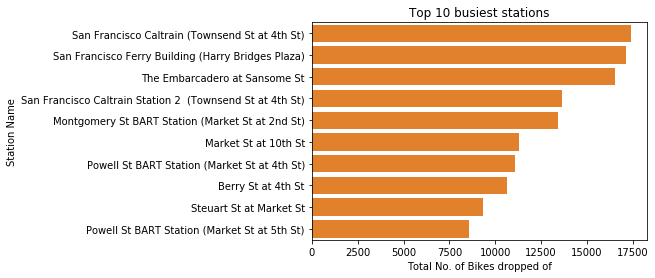

In [27]:
sb.barplot(x=df.end_station_name.value_counts()[:10].values, y=df.end_station_name.value_counts()[:10].index, color=sb.color_palette()[1] )
plt.xlabel('Total No. of Bikes dropped of')
plt.ylabel('Station Name')
plt.title('Top 10 busiest stations');

As we can tell by looking at the horizontal bar charts, the top 5 stations for bike pick up and drop points are the same but they have different number of bikes involved. 

### Bivariate Exploration of Data

**Question : What is the relation in duration of bike usage for Subscribers and Non-Subcribers?**

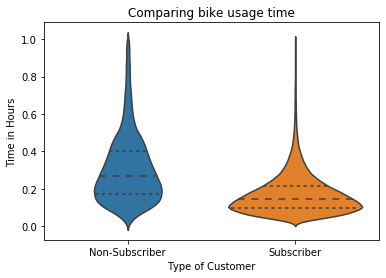

In [28]:
sb.violinplot(data = df[df.duration_hours < 1], x=df.user_type , y='duration_hours', inner="quartile")
plt.xlabel('Type of Customer')
plt.ylabel('Time in Hours')
plt.title('Comparing bike usage time');

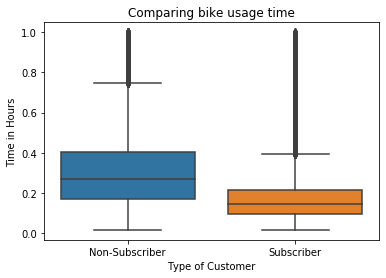

In [29]:
sb.boxplot(data = df[df.duration_hours < 1], x=df.user_type , y='duration_hours')
plt.xlabel('Type of Customer')
plt.ylabel('Time in Hours')
plt.title('Comparing bike usage time');

Since there are more subscribers we see the trend of more rental bike usage by them but, it is interesting to see Non-Subscribers usually use the bike for longer period over subscribers. I am assuming they use bike for leisure unlike the subscribers who usually use them for communting to work place. 

**Question : Do Non-Subscribers usually rent the bike on weekends?** 

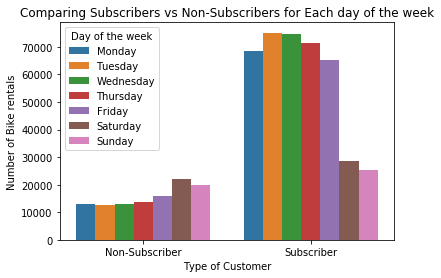

In [30]:
sb.countplot(data=df, x='user_type',hue='start_day_week')
plt.xlabel('Type of Customer')
plt.ylabel('Number of Bike rentals')
plt.title('Comparing Subscribers vs Non-Subscribers for Each day of the week')
plt.legend(title = 'Day of the week');

The amount of bike rented for **subscribers is higher for weekdays** over weekends. <br>
The amount of bike rented for **non-subscribers is higher for weekend** over weekdays.

**Question : How many bikes are rented each month for less than 10 minutes?** 

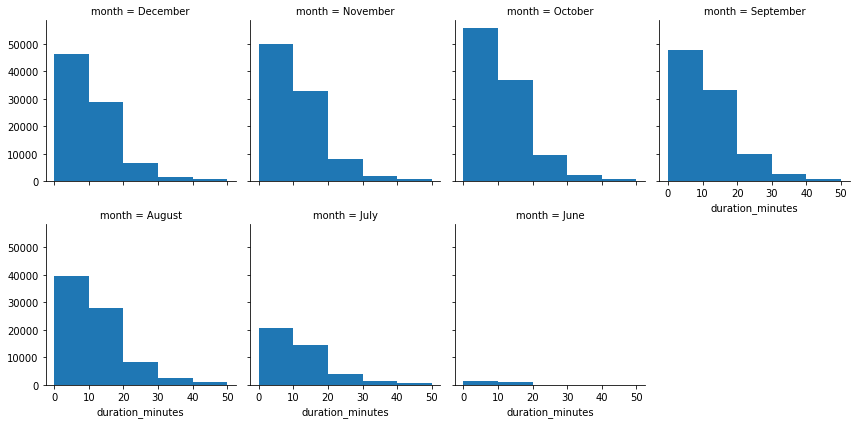

In [31]:
bin_edge = np.arange(0, 60, 10)
g = sb.FacetGrid(data=df, col='month', col_wrap=4)
g.map(plt.hist,'duration_minutes',bins =bin_edge);

October had the most number of rentals which we found previously.The Faceting shows us - it also holds the record for most  10 minutes rentals followed by November and September. 

### Multivariate Exploration of Data

**Question : Display the combination of - the days of the week for each type of user to visualize the bike rental duration**

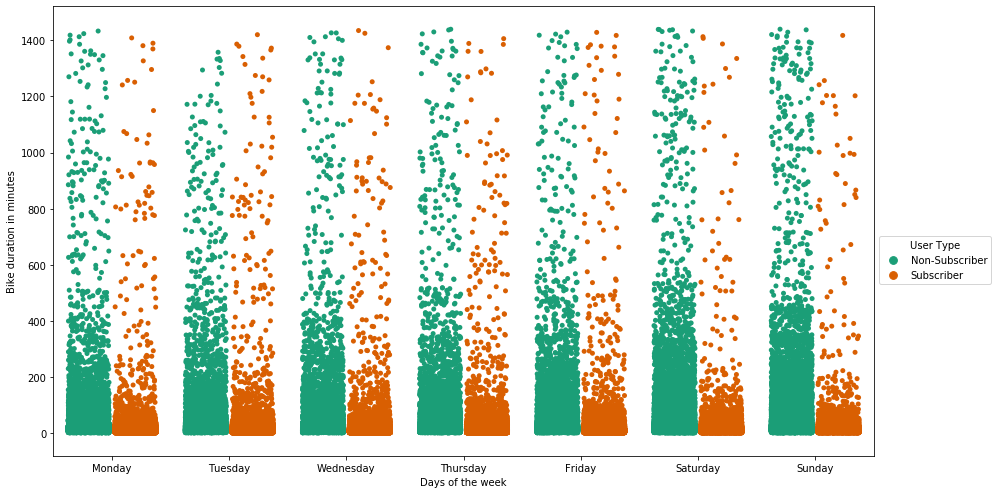

In [32]:
# scatterplot - duration and day - by user type
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df, x = 'start_day_week', y = 'duration_minutes', hue = 'user_type',
            jitter = 0.35, dodge = True, palette='Dark2')
plt.ylabel('Bike duration in minutes')
plt.xlabel('Days of the week')
plt.legend(title='User Type', bbox_to_anchor=(1,0.5));

Up to 100 mintues per day - Both user types are heavily utilizing the bike rentals but it fades away slowly reaching to a mark of 1400 mintues which is not very usual.

## Insights: 

**Based on our findings we have confirmed that out that Subscribers tend to use the bikes on weekdays for their communting due to high traffic in San-Francisco. The Non-Subscribers use the bikes mostly on weekends probably as a leisure activity.** 

**The Autumn season is the most popular for renting bikes because the weather is pleasant.**

**Some stations like Caltrain, Ferry Building and Embarcadero are popluar spots for bike rentals.**